<a href="https://colab.research.google.com/github/tsgomes9/Analise_de_Credito_-_Naive_Bayess/blob/main/Analise_de_Credito___Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Criação de um modelo para análise de crédito baseado em diversos dados dos clientes utilizando a técnica Naive Bayes. O modelo deve classificar os clientes como bons (good) e maus (bad) pagadores.

### **Importação de bibliotecas**

In [110]:
import pandas as pd
import numpy as np
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix

### **Importação e visualização da base de dados**

In [111]:
credito = pd.read_csv('/content/drive/MyDrive/Bases de dados/Credit.csv')
credito.shape

(1000, 21)

In [136]:
credito.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


### **Divisão da base de dados (Previsores e Classes)**

Nesta etapa é realizada a divisão da base de dados. Onde os previsores correspondem as colunas de 0 a 19 e os dados de classe estão contidos na coluna 20.

In [114]:
previsores = credito.iloc[:,0:20].values
classe = credito.iloc[:,20].values

### **Conversão de dados categóricos**

Para treinamento e execução do modelo, é necessário que todos os dados categóricos sejam convertidos em dados numéricos.

In [115]:
labelencoder = LabelEncoder()
previsores [:,0] = labelencoder.fit_transform(previsores[:,0])

labelencoder2 = LabelEncoder()
previsores [:,2] = labelencoder2.fit_transform(previsores[:,2])

labelencoder3 = LabelEncoder()
previsores [:,3] = labelencoder3.fit_transform(previsores[:,3])

labelencoder4 = LabelEncoder()
previsores [:,5] = labelencoder4.fit_transform(previsores[:,5])

labelencoder5 = LabelEncoder()
previsores [:,6] = labelencoder5.fit_transform(previsores[:,6])

labelencoder6 = LabelEncoder()
previsores [:,8] = labelencoder6.fit_transform(previsores[:,8])

labelencoder7 = LabelEncoder()
previsores [:,9] = labelencoder7.fit_transform(previsores[:,9])

labelencoder8 = LabelEncoder()
previsores [:,11] = labelencoder8.fit_transform(previsores[:,11])

labelencoder9 = LabelEncoder()
previsores [:,13] = labelencoder9.fit_transform(previsores[:,13])

labelencoder10 = LabelEncoder()
previsores [:,14] = labelencoder10.fit_transform(previsores[:,14])

labelencoder11 = LabelEncoder()
previsores [:,16] = labelencoder11.fit_transform(previsores[:,16])

labelencoder12 = LabelEncoder()
previsores [:,18] = labelencoder12.fit_transform(previsores[:,18])

labelencoder13 = LabelEncoder()
previsores [:,19] = labelencoder13.fit_transform(previsores[:,19])

In [116]:
previsores

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

### **Divisão da base de dados (Treinamento e Testes)**

Para este modelo será utilizado 30% da base para teste e 70% para treinamento

In [117]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_treinamento

array([[1, 24, 1, ..., 2, 1, 1],
       [0, 36, 3, ..., 1, 1, 1],
       [2, 15, 1, ..., 2, 1, 1],
       ...,
       [0, 9, 3, ..., 1, 0, 1],
       [1, 18, 1, ..., 1, 0, 1],
       [1, 36, 2, ..., 2, 1, 1]], dtype=object)

### **Criação, treinamento e previsão**

Aqui é criado o modelo utilizando as variaveis de treinamento.

In [118]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_treinamento, y_treinamento)

GaussianNB()

Então é utilizada a base de teste para verificar o funcionamento da base

In [119]:
prev = naive_bayes.predict(X_teste)

A taxa de acerto do modelo é de 71%

In [137]:
taxa_acerto = accuracy_score(y_teste, prev)
taxa_erro = 1 - taxa_acerto
taxa_acerto

0.71

Para uma visualização mais detalhada dos resultados, utilizamos a matrix de confusão

In [122]:
confusao = confusion_matrix(y_teste, prev)
confusao

array([[ 41,  45],
       [ 42, 172]])

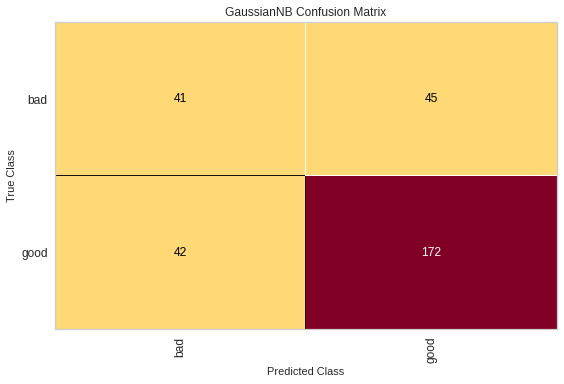

In [123]:
visualizacao = ConfusionMatrix(GaussianNB())
visualizacao.fit(X_treinamento, y_treinamento)
visualizacao.score(X_teste, y_teste)
visualizacao.poof()

### **Utilizando o modeo com outra base de dados**

In [124]:
novo = pd.read_csv('/content/drive/MyDrive/Bases de dados/NovoCredit.csv')
novo

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [125]:
novo = novo.iloc[:,0:20].values
type(novo)

numpy.ndarray

In [126]:
novo[:,0] = labelencoder.transform(novo[:,0])
novo[:, 2] = labelencoder2.transform(novo[:, 2])
novo[:, 3] = labelencoder3.transform(novo[:, 3])
novo[:, 5] = labelencoder4.transform(novo[:, 5])
novo[:, 6] = labelencoder5.transform(novo[:, 6])
novo[:, 8] = labelencoder6.transform(novo[:, 8])
novo[:, 9] = labelencoder7.transform(novo[:, 9])
novo[:, 11] = labelencoder8.transform(novo[:, 11])
novo[:, 13] = labelencoder9.transform(novo[:, 13])
novo[:, 14] = labelencoder10.transform(novo[:, 14])
novo[:, 16] = labelencoder11.transform(novo[:, 16])
novo[:, 18] = labelencoder12.transform(novo[:, 18])
novo[:, 19] = labelencoder13.transform(novo[:, 19])

Resultado previsto:

In [127]:
naive_bayes.predict(novo)[0]

'good'